In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df.drop(df[['sepal length (cm)','sepal width (cm)']],axis='columns',inplace=True)

In [13]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


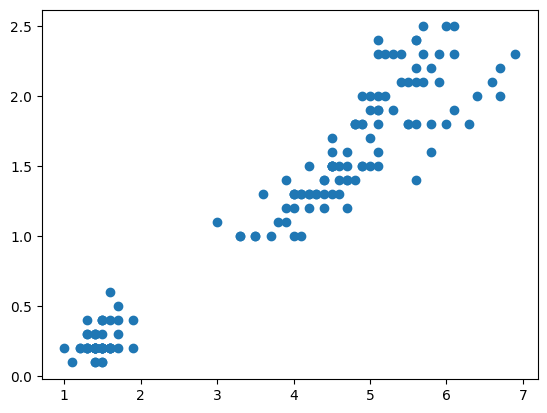

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [15]:
from sklearn.cluster import KMeans

In [25]:
k_range = range(1,20)
sse=[]
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [26]:
sse

[550.8953333333333,
 86.39021984551395,
 31.371358974358976,
 19.483000899685113,
 13.91690875790876,
 11.025145110250374,
 9.215301022648847,
 7.8499450549450565,
 6.456494541406307,
 5.528148730354612,
 5.124220991426873,
 4.695130980130979,
 4.388942488067486,
 3.939042069042068,
 3.6399891395154556,
 3.412017961570592,
 3.193361111111111,
 2.922177361169297,
 2.795145647653001]

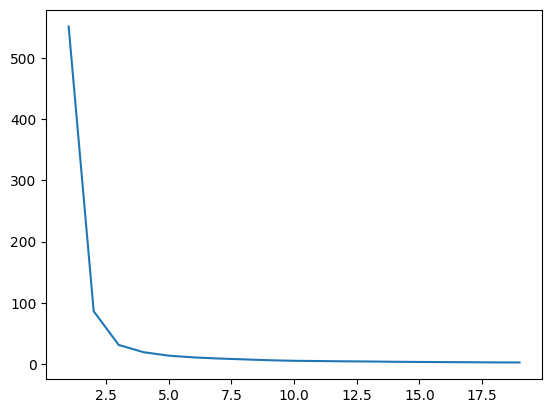

In [27]:
plt.plot(k_range,sse)

In [28]:
#we find that n = 3

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

In [32]:
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

In [33]:
df

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


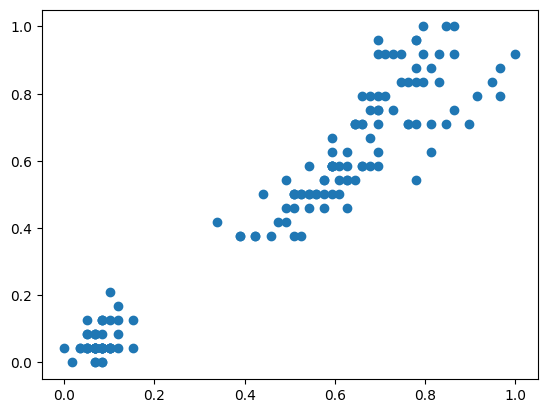

In [34]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [35]:
model = KMeans(n_clusters=3)

In [39]:
pred = model.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [40]:
df['pred'] = pred

In [41]:
df

,petal length (cm),petal width (cm),pred
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [42]:
df0 = df[df['pred']==0]
df1 = df[df['pred']==1]
df2 = df[df['pred']==2]

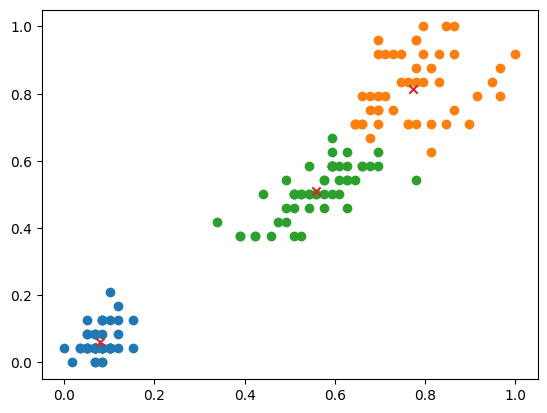

In [48]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='x')